[Data in Kaggle](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results?select=athlete_events.csv)

# Import the libraries

In [243]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore", message="Boolean Series key will be reindexed to match DataFrame index")

# Read the data

In [244]:
df = pd.read_csv("/content/athlete_events.csv")

In [245]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [247]:
df.duplicated().sum()

1385

### Don't forget to drop duplicates first

In [248]:
df1 = df[~df.duplicated()]

In [249]:
df1.duplicated().sum()

0

# <font color='red'>**Beginner level**</font>

### Find the missing data in each column

In [250]:
df1.isnull().sum()

ID             0
Name           0
Sex            0
Age         9315
Height     58814
Weight     61527
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     229959
dtype: int64

### Number of males and females

In [251]:
df1["Sex"].value_counts()

M    195353
F     74378
Name: Sex, dtype: int64

### How many cities do we have and what are they ?

In [252]:
df1["City"].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Calgary',
       'Albertville', 'Lillehammer', 'Los Angeles', 'Salt Lake City',
       'Helsinki', 'Lake Placid', 'Sydney', 'Atlanta', 'Stockholm',
       'Sochi', 'Nagano', 'Torino', 'Beijing', 'Rio de Janeiro', 'Athina',
       'Squaw Valley', 'Innsbruck', 'Sarajevo', 'Mexico City', 'Munich',
       'Seoul', 'Berlin', 'Oslo', "Cortina d'Ampezzo", 'Melbourne',
       'Roma', 'Amsterdam', 'Montreal', 'Moskva', 'Tokyo', 'Vancouver',
       'Grenoble', 'Sapporo', 'Chamonix', 'St. Louis', 'Sankt Moritz',
       'Garmisch-Partenkirchen'], dtype=object)

In [253]:
len(df1["City"].unique())

42

# <font color='red'>**Intermediate level**</fond>

### Find the number of athlete for each year

In [254]:
df_groupedByYear = df1.groupby("Year")

In [255]:
df_groupedByYear['ID'].count()

Year
1896      380
1900     1898
1904     1301
1906     1733
1908     3069
1912     4040
1920     4292
1924     5570
1928     5238
1932     2817
1936     7146
1948     7383
1952     9358
1956     6434
1960     9235
1964     9480
1968    10479
1972    11959
1976    10502
1980     8937
1984    11588
1988    14676
1992    16413
1994     3160
1996    13780
1998     3605
2000    13821
2002     4109
2004    13443
2006     4382
2008    13602
2010     4402
2012    12920
2014     4891
2016    13688
Name: ID, dtype: int64

### Which athlete participated the most? (his/her name and ID)

In [256]:
# His name is Heikki Ilmari Savolainen, and his ID is 106296
df1["Name"].value_counts()

Heikki Ilmari Savolainen    39
Joseph "Josy" Stoffel       38
Ioannis Theofilakis         36
Takashi Ono                 33
Alexandros Theofilakis      32
                            ..
Yuliya Anatolivna Kalina     1
Milan Kalina                 1
Jozef Kalina                 1
estmr Kalina                 1
Pierre-Georges LeClercq      1
Name: Name, Length: 134732, dtype: int64

In [257]:
result = df1[df["Name"] == "Heikki Ilmari Savolainen"]["ID"]
result.head(1)

211668    106296
Name: ID, dtype: int64

# <font color='red'>**Advanced level**</fond>

### Find the number of each medal for each year.
##### The output should look like this
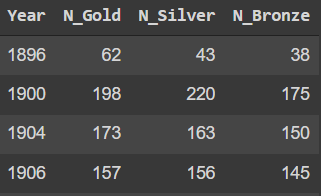

In [274]:
df3 = pd.DataFrame()

In [275]:
df3["Year"] = sorted(df1["Year"].unique())
df3.head()


ls = []
for i in df3["Year"]:
  j = df1[df1["Year"] == i][df1["Medal"] == 'Gold'].count()
  ls.append(j["Medal"])
df3["N_Gold"] = ls


ls = []
for i in df3["Year"]:
  j = df1[df1["Year"] == i][df1["Medal"] == 'Silver'].count()
  ls.append(j["Medal"])
df3["N_Silver"] = ls


ls = []
for i in df3["Year"]:
  j = df1[df1["Year"] == i][df1["Medal"] == 'Bronze'].count()
  ls.append(j["Medal"])
df3["N_Bronze"] = ls
df3.head()

,Year,N_Gold,N_Silver,N_Bronze
0,1896,62,43,38
1,1900,198,220,175
2,1904,173,163,150
3,1906,157,156,145
4,1908,294,281,256


# <font color='red'>**You are Geek!**</fond>
### Provide all your answers with plots

### Find the number of winners with the gold medal in each city?

In [263]:
goldMedals = df1[df1["Medal"] == "Gold"].groupby("City")["Medal"].count()

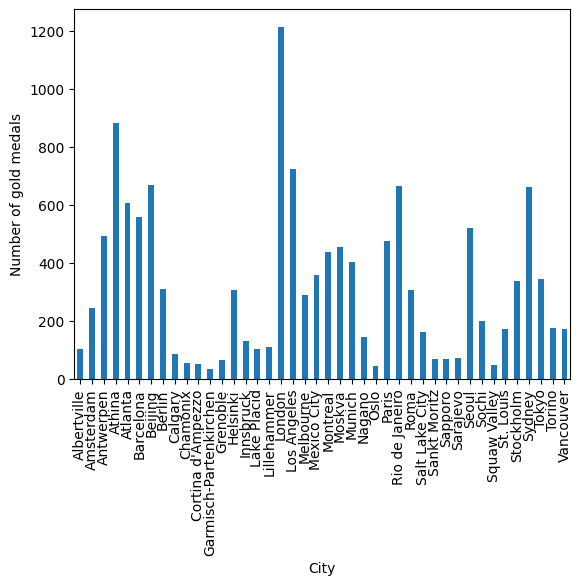

In [264]:
goldMedals.plot(kind = "bar")
plt.ylabel("Number of gold medals")
plt.show()

### Find the total missing data for each year?

In [265]:
missingData = df1.groupby('Year').apply(lambda x: x.isna().sum())
missingData.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
Year,,,,,,,,,,,,,,,
1896,0,0,0,163,334,331,0,0,0,0,0,0,0,0,237
1900,0,0,0,770,1782,1819,0,0,0,0,0,0,0,0,1305
1904,0,0,0,274,1088,1154,0,0,0,0,0,0,0,0,815
1906,0,0,0,743,1476,1528,0,0,0,0,0,0,0,0,1275
1908,0,0,0,637,2595,2587,0,0,0,0,0,0,0,0,2238


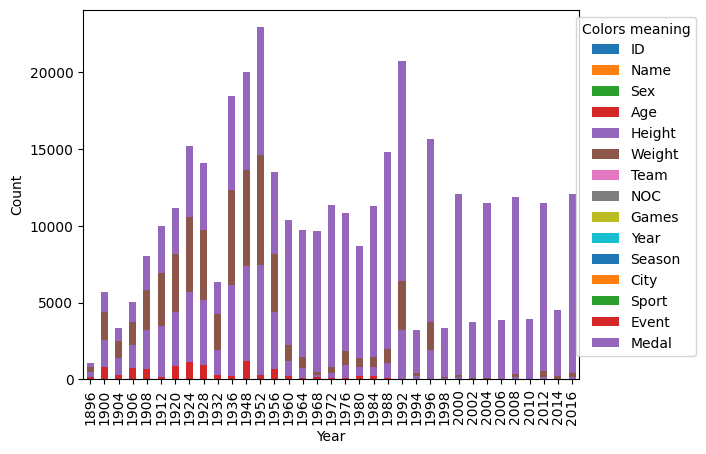

In [266]:
missingData.plot(kind = 'bar', stacked = True)
plt.ylabel("Count")
plt.legend(title = "Colors meaning", bbox_to_anchor=(1.25, 1), loc = "upper right")
plt.show()

# <font color='red'>**I dare you to solve this :)**</fond>
### Dont use for loops, and provide all your answers with plots.

### Has the number of athletes changed over time for Summer and Winter?

In [267]:
import matplotlib.pyplot as plt
import seaborn as sns

In [268]:
df_Summer = df1[df1["Season"] == "Summer"]

In [269]:
num1 = df_Summer.groupby("Year")["Name"].count()
num1.head()

Year
1896     380
1900    1898
1904    1301
1906    1733
1908    3069
Name: Name, dtype: int64

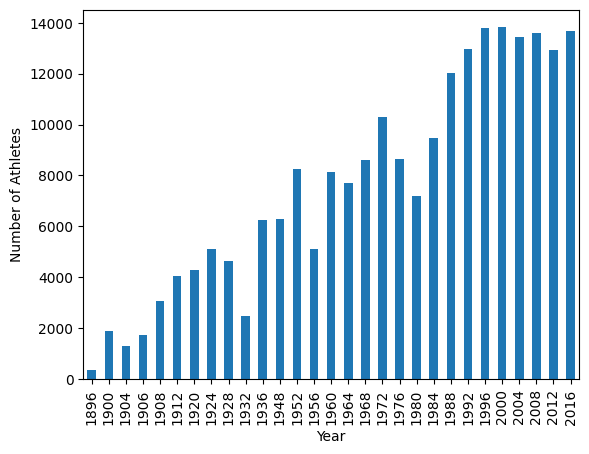

In [270]:
num1.plot(kind = 'bar')
plt.ylabel("Number of Athletes")
plt.show()

In [271]:
df_Winter = df1[df1["Season"] == "Winter"]

In [280]:
num2 = df_Winter.groupby("Year")["Name"].count()
num2.head()

Year
1924     460
1928     582
1932     352
1936     895
1948    1075
Name: Name, dtype: int64

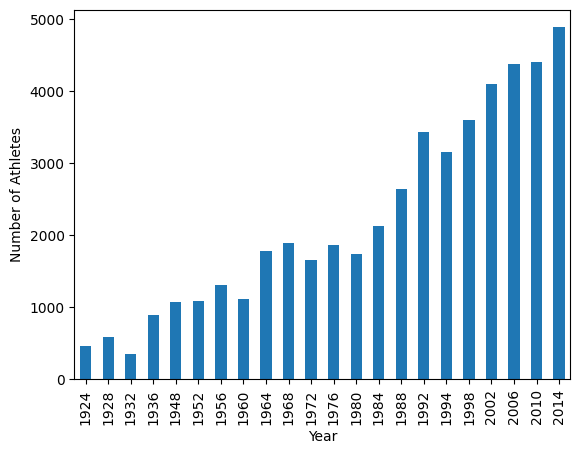

In [273]:
num2.plot(kind = 'bar')
plt.ylabel("Number of Athletes")
plt.show()